In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Importing the libraries
import matplotlib.pyplot as plt
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ubah pathnya sesuai lokasi dataset 
dataset_jagung=pd.read_csv('/content/drive/MyDrive/PROA-ML/Jagung.csv', na_values=['0'])

##Explore Dataset

In [ ]:
dataset_jagung.head()

,Provinsi,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ACEH,38924,28578,44921,45566,58679,65660,74449,36642,51232,...,96838,125155,112894,137753,167090,168861,167285,177842,202318.0,205125.0
1,SUMATERA UTARA,271298,311918,371578,398707,459715,509809,619667,666764,634162,...,682024,80485,1098969,1166548,1377718,1294645,1347124,1183011,1159795.0,1519407.0
2,SUMATERA BARAT,27969,36083,48115,53387,47001,65701,60161,56386,48820,...,202298,223233,351843,404795,354262,471849,495497,547417,605352.0,602549.0
3,RIAU,21699,33274,21455,38853,35253,41433,56317,48493,39915,...,34728,4041,47959,56521,41862,33197,31433,28052,28651.0,30870.0
4,JAMBI,10206,11337,14213,17895,17764,30320,30533,24875,23975,...,29288,30028,34616,38169,30691,25521,25571,25690,43617.0,51712.0


In [ ]:
provinsi = []

for values in dataset_jagung['Provinsi'].items():
  provinsi.append(values[1])
print(provinsi)

['ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI', 'SUMATERA SELATAN', 'BENGKULU', 'LAMPUNG', 'KEP. BANGKA BELITUNG', 'KEP. RIAU', 'DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH', 'DI YOGYAKARTA', 'JAWA TIMUR', 'BANTEN', 'BALI', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'KALIMANTAN BARAT', 'KALIMANTAN TENGAH', 'KALIMANTAN SELATAN', 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA', 'SULAWESI UTARA', 'SULAWESI TENGAH', 'SULAWESI SELATAN', 'SULAWESI TENGGARA', 'GORONTALO', 'SULAWESI BARAT', 'MALUKU', 'MALUKU UTARA', 'PAPUA BARAT', 'PAPUA']


In [ ]:
rows = []

for prov in provinsi:
  nama_prov = prov
  df_prov = dataset_jagung.loc[dataset_jagung['Provinsi'] == nama_prov]
  index_prov = df_prov.index.values[0]

  for name, values in df_prov.items():
    value=values[index_prov]
    if(nama_prov != value):
      try:
        val = int(values[index_prov])
      except:
        val = 0
      rows.append([nama_prov, name, val])

print(rows)

[['ACEH', '1993', 38924], ['ACEH', '1994', 28578], ['ACEH', '1995', 44921], ['ACEH', '1996', 45566], ['ACEH', '1997', 58679], ['ACEH', '1998', 65660], ['ACEH', '1999', 74449], ['ACEH', '2000', 36642], ['ACEH', '2001', 51232], ['ACEH', '2002', 60105], ['ACEH', '2003', 67386], ['ACEH', '2004', 77747], ['ACEH', '2005', 94426], ['ACEH', '2006', 96838], ['ACEH', '2007', 125155], ['ACEH', '2008', 112894], ['ACEH', '2009', 137753], ['ACEH', '2010', 167090], ['ACEH', '2011', 168861], ['ACEH', '2012', 167285], ['ACEH', '2013', 177842], ['ACEH', '2014', 202318], ['ACEH', '2015', 205125], ['SUMATERA UTARA', '1993', 271298], ['SUMATERA UTARA', '1994', 311918], ['SUMATERA UTARA', '1995', 371578], ['SUMATERA UTARA', '1996', 398707], ['SUMATERA UTARA', '1997', 459715], ['SUMATERA UTARA', '1998', 509809], ['SUMATERA UTARA', '1999', 619667], ['SUMATERA UTARA', '2000', 666764], ['SUMATERA UTARA', '2001', 634162], ['SUMATERA UTARA', '2002', 640593], ['SUMATERA UTARA', '2003', 687360], ['SUMATERA UTARA', 

In [ ]:
df = pd.DataFrame(rows, columns=['Provinsi', 'Tahun', 'Produksi'])
df.set_index(['Provinsi','Tahun'], inplace=True)
df.head()

Produksi
Provinsi Tahun          
ACEH     1993      38924
         1994      28578
         1995      44921
         1996      45566
         1997      58679

In [ ]:
df.to_csv('Jagung_Explore.csv')

##Create New Dataset 

In [ ]:
target_prov = 'ACEH' 

In [ ]:
rows = []

nama_prov = target_prov
df_prov = dataset_jagung.loc[dataset_jagung['Provinsi'] == nama_prov]
index_prov = df_prov.index.values[0]

for name, values in df_prov.items():
  value=values[index_prov]
  if(nama_prov != value):
    try:
      val = int(values[index_prov])
    except:
      val = 0
    rows.append([name, val])

print(rows)

df = pd.DataFrame(rows, columns=['Tahun', 'Produksi'])
df.set_index(['Tahun'], inplace=True)
df.head()

filename = target_prov + '_Jagung.csv'
df.to_csv(filename)

[['1993', 38924], ['1994', 28578], ['1995', 44921], ['1996', 45566], ['1997', 58679], ['1998', 65660], ['1999', 74449], ['2000', 36642], ['2001', 51232], ['2002', 60105], ['2003', 67386], ['2004', 77747], ['2005', 94426], ['2006', 96838], ['2007', 125155], ['2008', 112894], ['2009', 137753], ['2010', 167090], ['2011', 168861], ['2012', 167285], ['2013', 177842], ['2014', 202318], ['2015', 205125]]


# #Visualize

In [ ]:
dataset_explore=pd.read_csv('/content/Jagung_Explore.csv', index_col="Tahun")
dataset_explore.head()

,Provinsi,Produksi
Tahun,,
1993,ACEH,38924
1994,ACEH,28578
1995,ACEH,44921
1996,ACEH,45566
1997,ACEH,58679


In [ ]:
dataset_explore.columns

Index(['Provinsi', 'Produksi'], dtype='object')

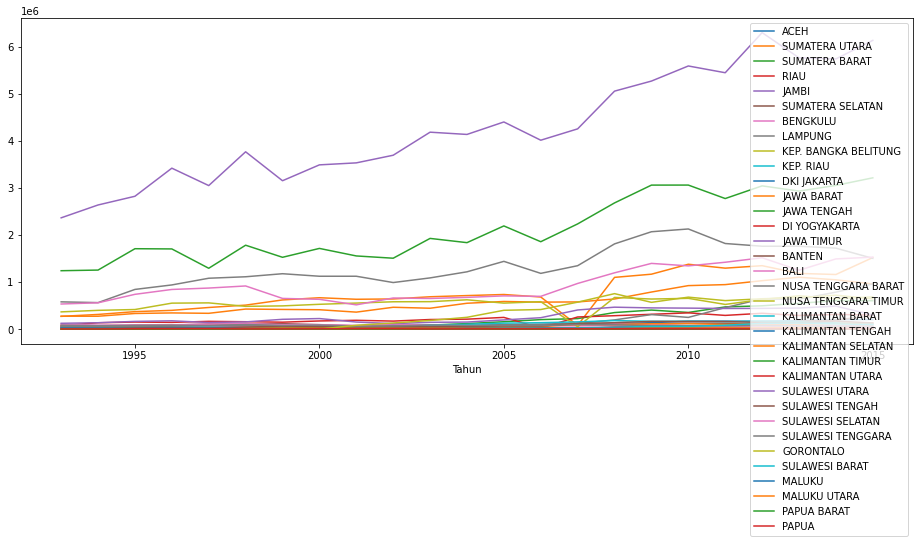

In [ ]:
for prov in provinsi:
  df_plot = dataset_explore.loc[dataset_explore['Provinsi'] == prov ]
  df_plot['Produksi'].plot(label = prov, figsize=(16,6)).legend()

In [ ]:
df_new = dataset_explore
df_new.shape

(782, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

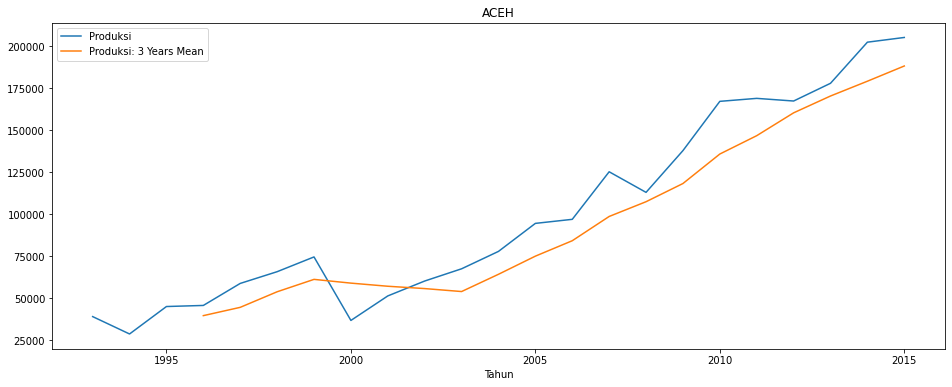

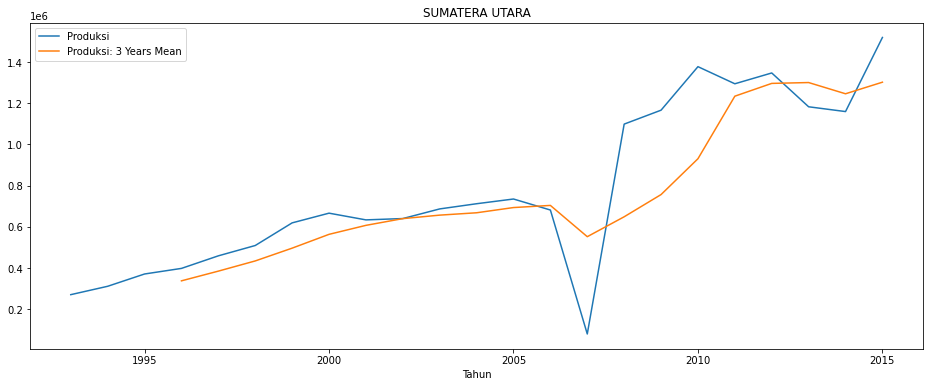

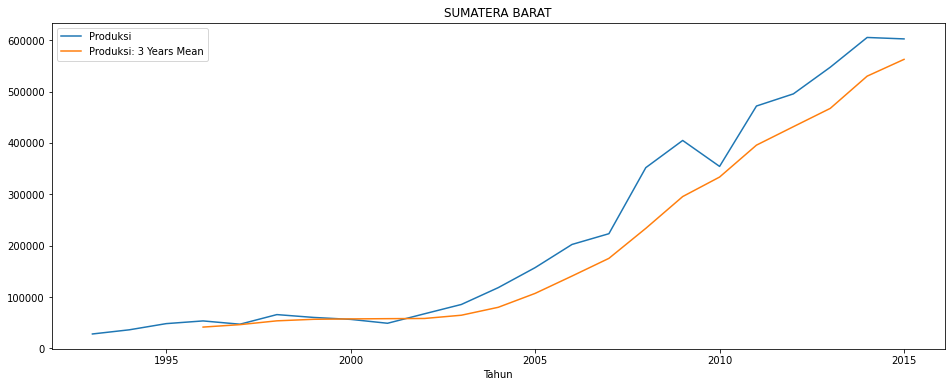

In [ ]:
sample_provinces = provinsi[:3]
for prov in sample_provinces:
  df_plot = df_new.loc[df_new['Provinsi'] == prov ]
  df_plot['Produksi: 3 Years Mean'] = df_plot['Produksi'].rolling(window=4).mean()
  df_plot[['Produksi','Produksi: 3 Years Mean']].plot(title=prov, figsize=(16,6))

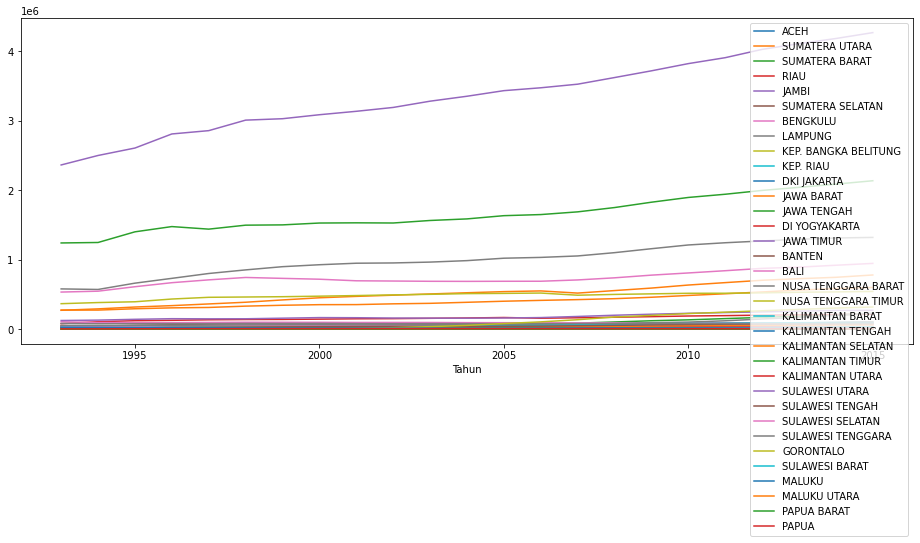

In [ ]:
# Optional specify a minimum number of periods
for prov in provinsi:
  df_plot = df_new.loc[df_new['Provinsi'] == prov ]
  df_plot['Produksi'].expanding(min_periods=1).mean().plot(label = prov, figsize=(16,6)).legend()

##MODELING

In [ ]:
dataset_prov =pd.read_csv('/content/'+filename, index_col="Tahun")
df_prov = dataset_prov
df_prov.head()

,Produksi
Tahun,
1993,38924
1994,28578
1995,44921
1996,45566
1997,58679


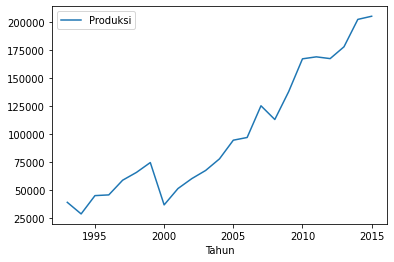

In [ ]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
df_prov.plot() 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
num_samples = df_prov.shape[0]
separator = int(num_samples * 0.7)
train = df_prov[:separator]
test = df_prov[separator:]

print(train.shape, test.shape)
print(train.shape, test.shape)

(16, 1) (7, 1)
(16, 1) (7, 1)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(train)
sc.fit(test)

MinMaxScaler()

In [ ]:
scaled_train = sc.transform(train)
scaled_test = sc.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
# How many record to take into account
n_input = 3
n_features = 1
batch_size= 5

In [ ]:
generator_train = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=batch_size)
generator_test = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=batch_size)

In [ ]:
#Building the RNN
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dropout(0.2))
# model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 8)                 808       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 11,017
Trainable params: 11,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 8)                 808       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 11,017
Trainable params: 11,017
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 20
history = model.fit_generator(generator_train, epochs=epochs, verbose=2, validation_data=generator_test)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


3/3 - 2s - loss: 1.0961 - val_loss: 1.1101 - 2s/epoch - 506ms/step
Epoch 2/20
3/3 - 0s - loss: 0.8545 - val_loss: 1.1361 - 64ms/epoch - 21ms/step
Epoch 3/20
3/3 - 0s - loss: 0.6181 - val_loss: 1.1679 - 64ms/epoch - 21ms/step
Epoch 4/20
3/3 - 0s - loss: 0.3925 - val_loss: 1.2109 - 63ms/epoch - 21ms/step
Epoch 5/20
3/3 - 0s - loss: 0.1990 - val_loss: 1.2655 - 61ms/epoch - 20ms/step
Epoch 6/20
3/3 - 0s - loss: 0.0792 - val_loss: 1.3063 - 75ms/epoch - 25ms/step
Epoch 7/20
3/3 - 0s - loss: 0.0870 - val_loss: 1.3186 - 66ms/epoch - 22ms/step
Epoch 8/20
3/3 - 0s - loss: 0.1159 - val_loss: 1.2815 - 65ms/epoch - 22ms/step
Epoch 9/20
3/3 - 0s - loss: 0.0911 - val_loss: 1.2245 - 79ms/epoch - 26ms/step
Epoch 10/20
3/3 - 0s - loss: 0.0595 - val_loss: 1.1743 - 74ms/epoch - 25ms/step
Epoch 11/20
3/3 - 0s - loss: 0.0654 - val_loss: 1.1286 - 73ms/epoch - 24ms/step
Epoch 12/20
3/3 - 0s - loss: 0.0739 - val_loss: 1.1025 - 76ms/epoch - 25ms/step
Epoch 13/20
3/3 - 0s - loss: 0.0733 - val_loss: 1.0920 - 72ms

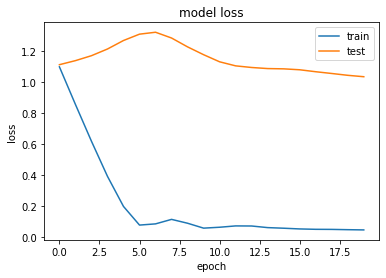

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
prediction_result = []

test_batches = scaled_train[-n_input:]
reshaping_batches = test_batches.reshape((1, n_input, n_features))

In [ ]:
for i in range(len(test)):
    predicted_output = model.predict(reshaping_batches )[0]
    prediction_result.append(predicted_output) 
    reshaping_batches = np.append(reshaping_batches [:,1:,:],[[predicted_output]],axis=1)

In [ ]:
prediction_result

[array([-0.32198614], dtype=float32),
 array([-0.34261218], dtype=float32),
 array([-0.33988664], dtype=float32),
 array([-0.34678093], dtype=float32),
 array([-0.3487377], dtype=float32),
 array([-0.35208738], dtype=float32),
 array([-0.35421738], dtype=float32)]

(7, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


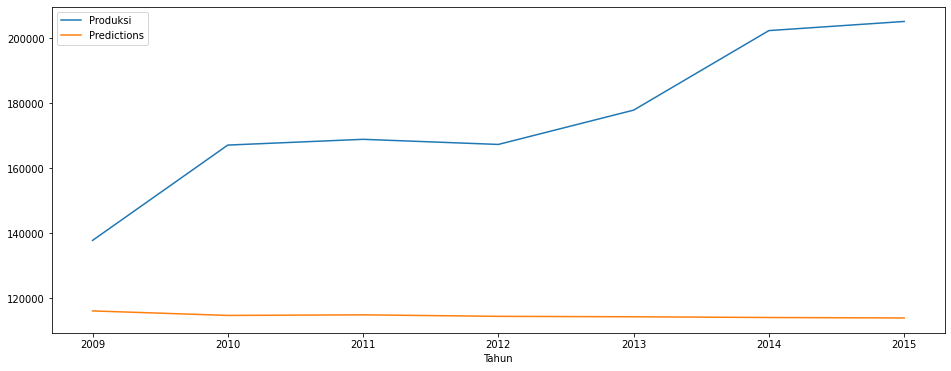

In [ ]:
actual_values = sc.inverse_transform(prediction_result)
print(actual_values.shape)
test['Predictions'] = actual_values
test.plot(figsize=(16,6))

In [ ]:
# calculate RMSE
from sklearn.metrics import mean_squared_error,r2_score
results = np.array(prediction_result).squeeze()
scaled_test = np.array(scaled_test).squeeze()

mse = mean_squared_error(scaled_test, results)
rmse = np.sqrt(mean_squared_error(scaled_test, results))
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
# print('R2 Score: %.3f' % r2)

Test MSE: 0.916
Test RMSE: 0.957
